## Librerías

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from datetime import datetime as dt
import datetime

plt.style.use("seaborn-v0_8")
sns.set_style("white", {"facecolor" : "white"})
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

## Funciones

In [2]:
def df_status(df):
    num_filas = df.shape[0]

    dfZeros = (
        (df == 0)
        .sum(axis = 0)
        .reset_index(name = "q_zeros")
        .assign(p_zeros = lambda x : round(x.q_zeros / num_filas * 100, 4))
    )

    dfNa = (
        df
        .isnull()
        .sum(axis = 0)
        .reset_index(name = "q_na")
        .assign(p_na = lambda x : round(x.q_na / num_filas * 100, 4))
    )

    dfUnique = (
        df
        .nunique()
        .reset_index(name = "unique")
    )

    dfType = (
        df
        .dtypes
        .reset_index(name = "type")
        .assign(type = lambda x : x.type.astype(str))
    )

    dfstatus = (
        dfZeros
        .merge(dfNa, on = "index", how = "left")
        .merge(dfUnique, on = "index", how = "left")
        .merge(dfType, on = "index", how = "left")
        .rename(columns = {"index" : "variable"})
    )

    return dfstatus

## Cargando datos

In [3]:
dataset = pd.read_csv("../Data/DataTransaccion.csv", sep = ";", encoding = "latin1")
dataset

,Customer_ID,SKU,DiaCompra,Monto_Venta,Cuotas,Edad,NSE,Genero,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra
0,ID_001234,12555804,01/02/2019,7.54,1,52,A,F,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA
1,ID_001235,12542056,01/02/2019,11.06,2,65,C,F,San Borja,J14-ESTACIONAL,J1402-NAVIDAD,MICA
2,ID_001236,12542081,01/02/2019,9.48,1,72,A,M,Surquillo,J14-ESTACIONAL,J1402-NAVIDAD,MICA
3,ID_001237,12441040,01/02/2019,38.70,1,33,D,F,San Martin de Porres,J15-BASICOS DECOHOGAR,J1504-COMEDOR,MICA
4,ID_001238,11761149,01/02/2019,11.60,1,36,C,F,San Miguel,J15-BASICOS DECOHOGAR,J1504-COMEDOR,MICA
...,...,...,...,...,...,...,...,...,...,...,...,...
1048567,ID_282287,880062594,12/06/2019,39.90,2,42,C,F,Santa Anita,J05-RINCON JUVENIL DAMAS,J0503-TOPS,SYBILLA
1048568,ID_310341,13074586,12/06/2019,29.90,1,48,C,F,Santa Anita,J05-RINCON JUVENIL DAMAS,J0502-BOTTOMS,SYBILLA
1048569,ID_045411,880066140,12/06/2019,49.50,2,60,C,F,Santa Anita,J04-DAMAS,J0401-TOPS SENORAS,APOLOGY
1048570,ID_284107,13336821,12/06/2019,34.50,1,24,C,M,Santa Anita,J05-RINCON JUVENIL DAMAS,J0501-DENIM,SYBILLA


## Calidad de datos

In [4]:
df_status(dataset)

,variable,q_zeros,p_zeros,q_na,p_na,unique,type
0,Customer_ID,0,0.0,0,0.0,308947,object
1,SKU,0,0.0,0,0.0,140939,int64
2,DiaCompra,0,0.0,0,0.0,338,object
3,Monto_Venta,0,0.0,0,0.0,13705,float64
4,Cuotas,0,0.0,0,0.0,31,int64
5,Edad,0,0.0,0,0.0,79,int64
6,NSE,0,0.0,0,0.0,4,object
7,Genero,0,0.0,0,0.0,2,object
8,LocalCompra,0,0.0,0,0.0,18,object
9,JerarquiaCompra,0,0.0,0,0.0,17,object


* No se tienen datos faltantes registrados de forma directa en el dataset (falta ver anomalía en las variables)
* La cantidad de valores únicos de Customer_ID no coinciden con el número de filas del dataset, esto se debe a que al menos un cliente ha vuelto a realizar una compra en un tiempo diferente.
* Se tienen 140939 SKUs diferentes vendidos en todo el dataset.
* Se cuentan con 338 fechas diferentes de compra, nos da una idea del histórico que podemos tener de esta muestra de datos.
* No se cuentan con valores de cero en cualquiera de las variables.

## Análisis Preliminar (Calidad de Datos)

Se van a inspeccionar aquellas variables donde se tenga posiblemente registros anómalos:

- DiaCompra
- Monto_Venta
- Cuotas
- Edad

In [5]:
variables = ["Monto_Venta", "Cuotas", "Edad"]

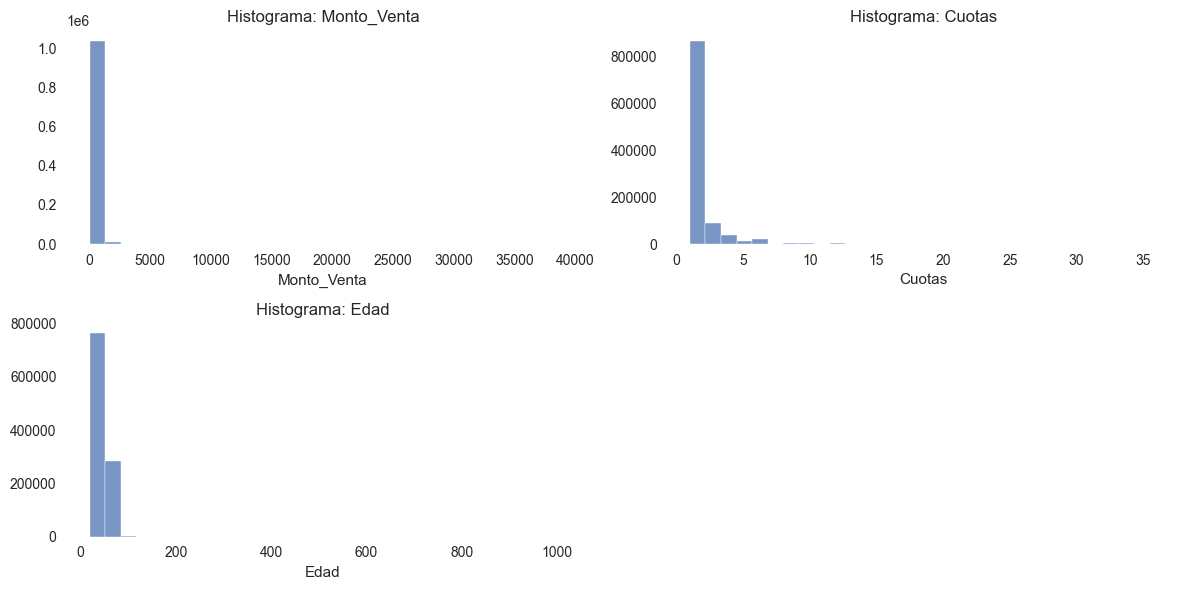

In [6]:
fig = plt.figure(figsize = (12, 6))
gs = GridSpec(nrows = 2, ncols = 2)

for i, variable in enumerate(variables):
    ax = plt.subplot(gs[i])

    ax2 = sns.histplot(data = dataset, x = variable, ax = ax, bins = 30)
    ax2.set_title(f"Histograma: {variable}")
    ax2.set_ylabel("")

plt.tight_layout()
plt.show()

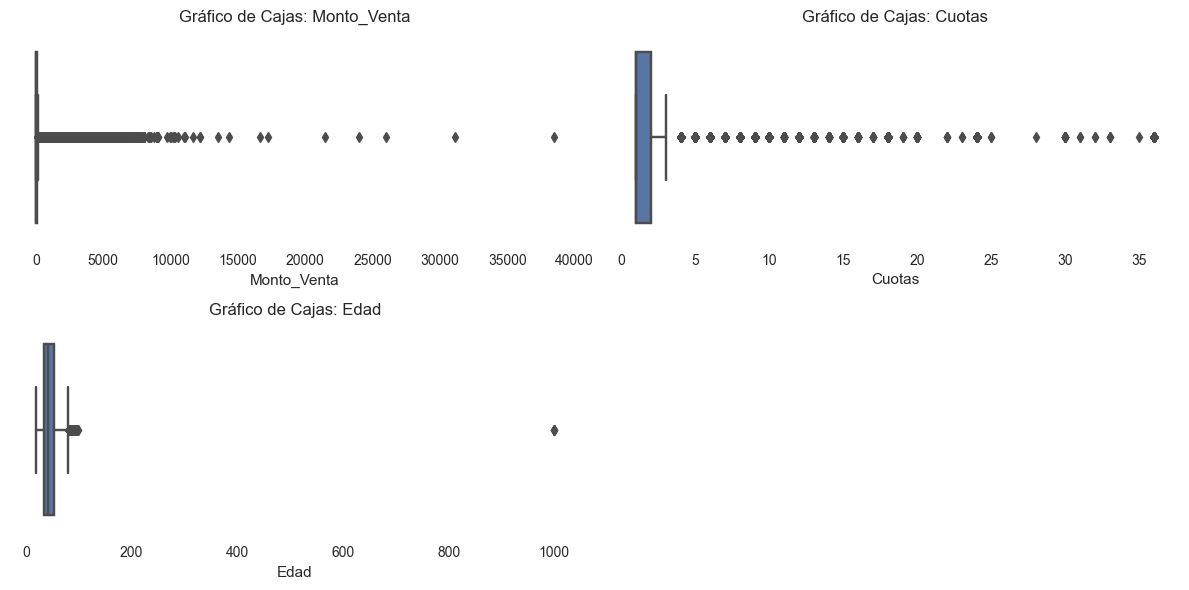

In [7]:
fig = plt.figure(figsize = (12, 6))
gs = GridSpec(nrows = 2, ncols = 2)

for i, variable in enumerate(variables):
    ax = plt.subplot(gs[i])

    ax2 = sns.boxplot(data = dataset, x = variable, ax = ax)
    ax2.set_title(f"Gráfico de Cajas: {variable}")
    ax2.set_ylabel("")

plt.tight_layout()
plt.show()

* Observamos que en el caso de Edad se tienen datos fuera de un rango natural, hay datos de Edad que superan los 900 años

In [8]:
(
    dataset
    .query("Edad > 90")
    .value_counts(["Edad"])
)

Edad
92      30
91      25
94       5
999      4
93       2
98       2
95       1
Name: count, dtype: int64

In [9]:
(
    dataset
    .value_counts(["DiaCompra"])
    .reset_index()
    .head(10)
)

,DiaCompra,count
0,12/06/2019,18290
1,11/08/2019,15719
2,05/03/2019,11437
3,6/28/2019,10041
4,06/08/2019,9711
5,3/30/2019,9050
6,4/20/2019,8663
7,10/19/2019,8478
8,05/12/2019,8043
9,6/16/2019,7974


In [10]:
(
    dataset
    [["DiaCompra"]]
    .assign(primer_numero = lambda x : x["DiaCompra"].str.split("/").str[0], 
            segundo_numero = lambda x : x["DiaCompra"].str.split("/").str[1], 
            tercer_numero = lambda x : x["DiaCompra"].str.split("/").str[2]
    )
    .query("(segundo_numero == '29' & primer_numero == '2')")
)

,DiaCompra,primer_numero,segundo_numero,tercer_numero
155361,2/29/2019,2,29,2019
155362,2/29/2019,2,29,2019
155363,2/29/2019,2,29,2019
155364,2/29/2019,2,29,2019
155365,2/29/2019,2,29,2019
...,...,...,...,...
158040,2/29/2019,2,29,2019
158041,2/29/2019,2,29,2019
158042,2/29/2019,2,29,2019
158043,2/29/2019,2,29,2019


In [12]:
## ¿Cuántos datos de fecha están mal registrados?

print(f"Se tiene un {round(2684 / dataset.shape[0] * 100, 2)}% de registros de fecha mal ingresados")

Se tiene un 0.26% de registros de fecha mal ingresados


## Preparación de datos

In [14]:
dataset_p = (
    dataset
    # omitiendo edades superiores a 100
    .query("Edad < 100")
    .assign(primer_numero = lambda x : x["DiaCompra"].str.split("/").str[0], 
            segundo_numero = lambda x : x["DiaCompra"].str.split("/").str[1], 
            tercer_numero = lambda x : x["DiaCompra"].str.split("/").str[2], 
            Monto_Venta_log = lambda x : np.log10(x["Monto_Venta"])
    )
    # Eliminando fechas mal registradas
    .query("~(segundo_numero == '29' & primer_numero == '2')")
    .assign(DiaCompra = lambda x : x["DiaCompra"].apply(lambda y : dt.strptime(y, "%m/%d/%Y") if y[0] != "0" else dt.strptime(y, "%d/%m/%Y")))
    .drop(columns = ["primer_numero", "segundo_numero", "tercer_numero"])
    .sample(100000, random_state = 42)
)
dataset_p.head()

,Customer_ID,SKU,DiaCompra,Monto_Venta,Cuotas,Edad,NSE,Genero,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra,Monto_Venta_log
689429,ID_091292,13103230,2019-12-08,139.00,1,25,C,F,San Borja,J04-DAMAS,J0414-BENETTON,SISLEY,2.143015
243144,ID_114776,12017686,2019-05-04,69.90,1,48,A,M,San Miguel,J08-PERFUMERIA,J0802-PERFUMERIA SELECTIVA,BEYONCE,1.844477
116783,ID_075292,12600703,2019-02-16,99.00,2,41,A,M,Surco,J01-HOMBRES,J0105-TOPS SPORT,LA MARTINA,1.995635
937809,ID_149234,13158149,2019-11-11,4.95,1,31,B,F,San Miguel,J13-DECORACION,J1304-REGALOS,MICA,0.694605
555114,ID_216999,11955372,2019-08-07,24.90,1,35,A,F,San Borja,J15-BASICOS DECOHOGAR,J1504-COMEDOR,BASEMENT HOME,1.396199


## Análisis y Clustering

In [15]:
dfMontos = (
    dataset_p
    .assign(Monto_Venta_log = lambda x : np.log10(x["Monto_Venta"]))
)

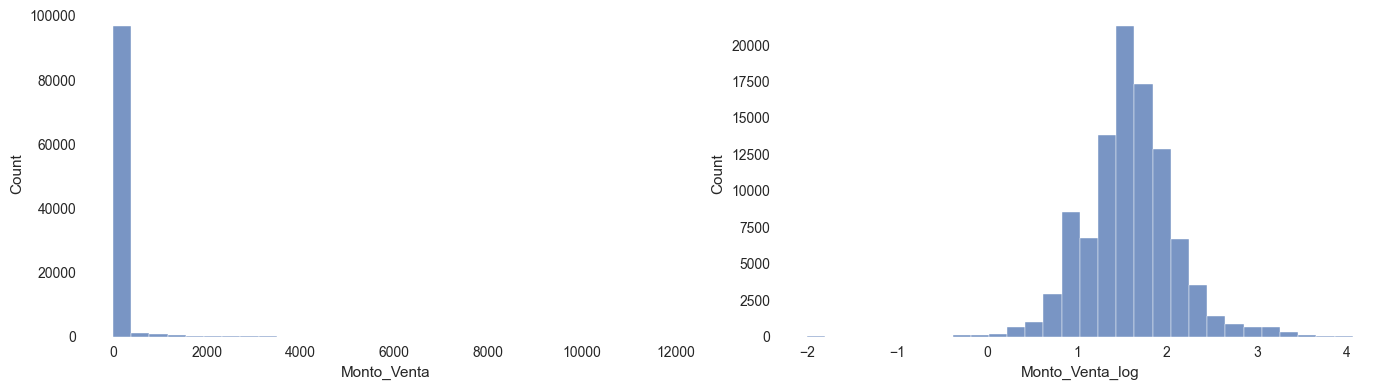

In [16]:
fig = plt.figure(figsize = (14, 4))
gs = GridSpec(nrows = 1, ncols = 2)

for i, variable in enumerate(["Monto_Venta", "Monto_Venta_log"]):
    ax = plt.subplot(gs[i])

    ax2 = sns.histplot(x = dfMontos[variable], bins = 30)

plt.tight_layout()
plt.show()

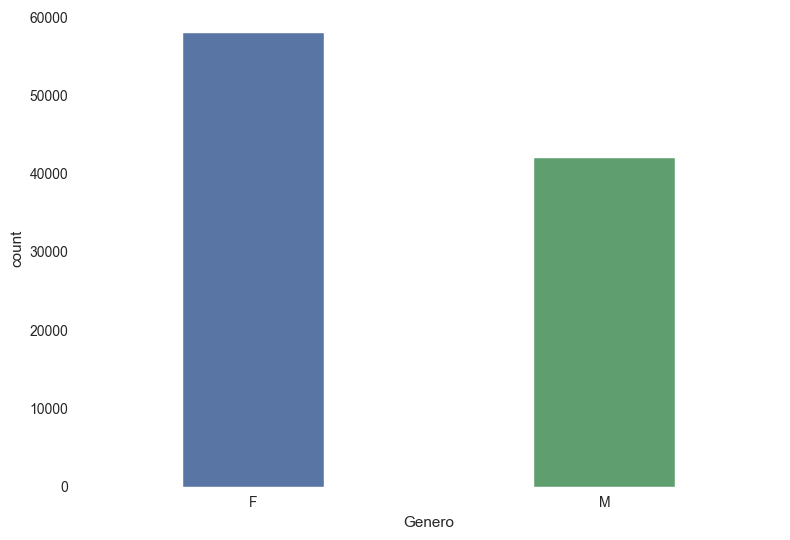

In [17]:
sns.countplot(data = dataset_p, x = "Genero", width = 0.4)

plt.tight_layout()
plt.show()

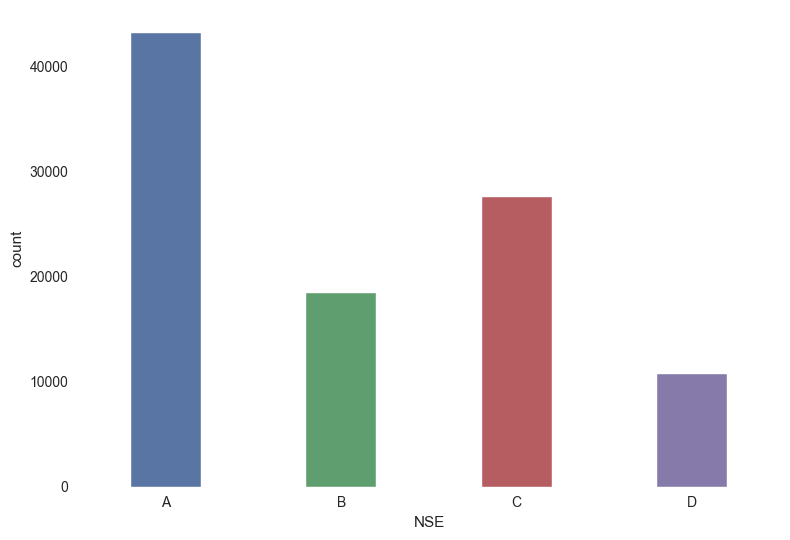

In [18]:
sns.countplot(data = dataset_p, x = "NSE", width = 0.4, order = ["A", "B", "C", "D"])

plt.tight_layout()
plt.show()

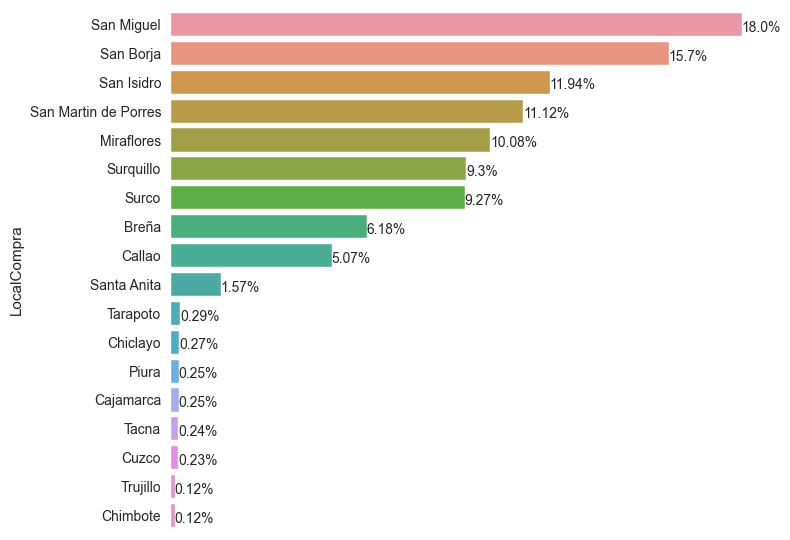

In [19]:
dfTopLocales = (
    dataset_p
    .value_counts(["LocalCompra"])
    .reset_index(name = "n")
    .assign(prop = lambda x : x.n / sum(x.n))
)

fig = plt.figure()

ax = sns.barplot(data = dfTopLocales, x = "prop", y = "LocalCompra")

for i, etiqueta in enumerate(dfTopLocales["prop"]):
    ax.annotate(text = f"{round(etiqueta * 100, 2)}%", xy = (etiqueta, i + 0.25))

ax.xaxis.set_visible(False)
plt.tight_layout()
plt.show()

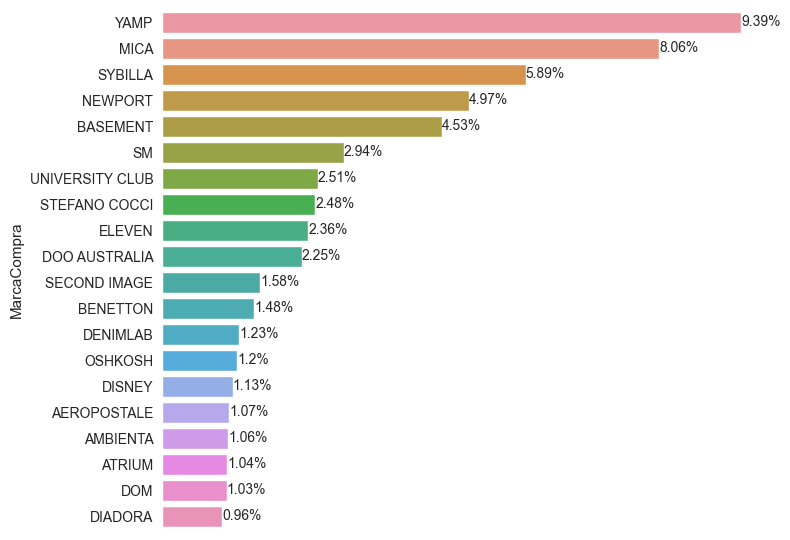

In [21]:
dfTopMarca = (
    dataset_p
    .value_counts(["MarcaCompra"])
    .reset_index(name = "n")
    .assign(prop = lambda x : x.n / sum(x.n))
    .head(20)
)

fig = plt.figure()

ax = sns.barplot(data = dfTopMarca, x = "prop", y = "MarcaCompra")

for i, etiqueta in enumerate(dfTopMarca["prop"]):
    ax.annotate(text = f"{round(etiqueta * 100, 2)}%", xy = (etiqueta, i + 0.1))


ax.xaxis.set_visible(False)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/hr/5xw4wmxx2gg5x5fycfwtl2h40000gn/T/ipykernel_15494/2410318371.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

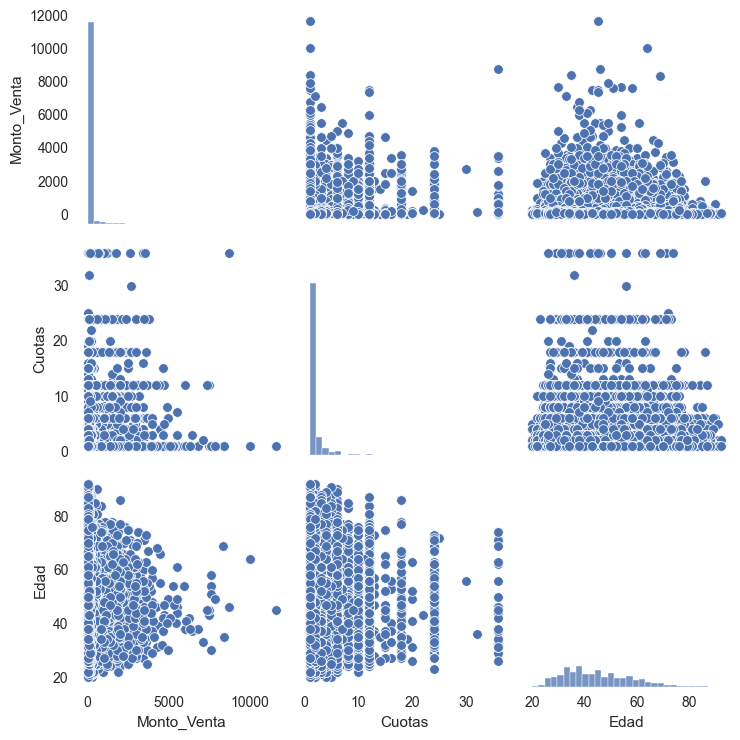

In [22]:
fig = plt.figure(figsize = (12, 6))

sns.pairplot(dataset_p[["Monto_Venta", "Cuotas", "Edad"]], diag_kws = {"bins" : 30})

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/hr/5xw4wmxx2gg5x5fycfwtl2h40000gn/T/ipykernel_15494/3993943843.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


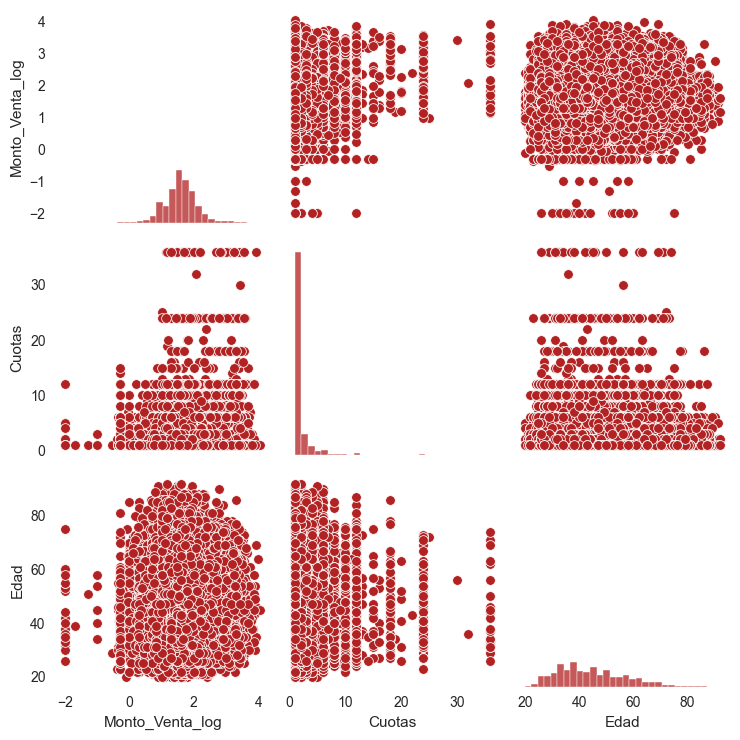

In [23]:
sns.pairplot(dataset_p[["Monto_Venta_log", "Cuotas", "Edad"]], diag_kws = {"bins" : 30, "color" : "firebrick"}, plot_kws = {"color" : "firebrick"})

plt.tight_layout()
plt.show()

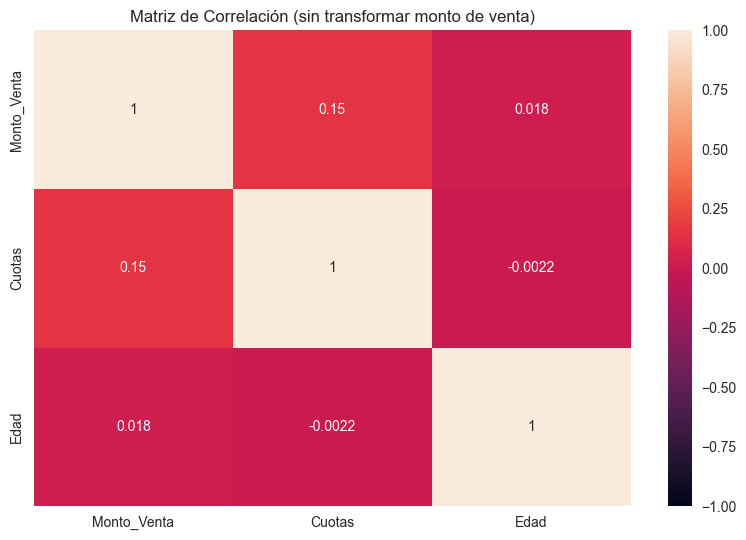

In [25]:
ax = sns.heatmap(dataset_p[["Monto_Venta", "Cuotas", "Edad"]].corr(method = "spearman"), vmin = -1, vmax = 1, annot=True)
ax.set_title("Matriz de Correlación (sin transformar monto de venta)")
plt.tight_layout()
plt.show()

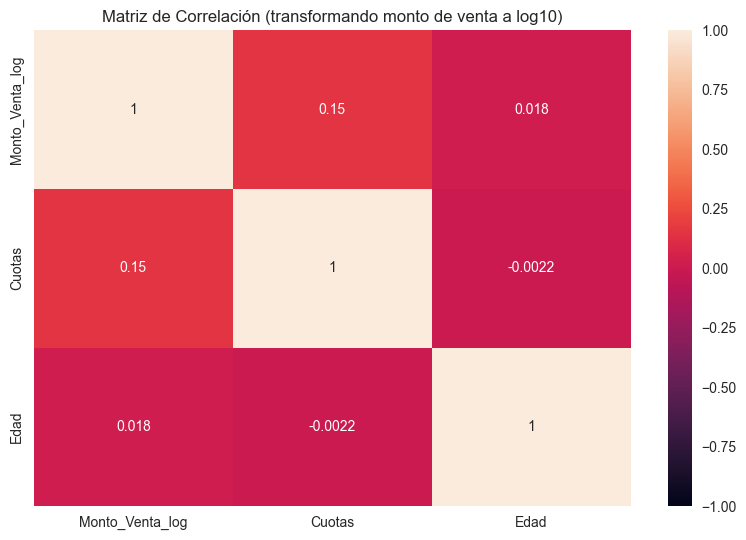

In [27]:
ax = sns.heatmap(dataset_p[["Monto_Venta_log", "Cuotas", "Edad"]].corr(method = "spearman"), vmin = -1, vmax = 1, annot=True)
ax.set_title("Matriz de Correlación (transformando monto de venta a log10)")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
variables = dataset_p[['Monto_Venta_log', 'Cuotas', 'Edad']]
escalador = StandardScaler()
variables_escaladas = escalador.fit_transform(variables)

In [31]:
## Vamos a almacenar la suma de las distancias al cuadrado entre cada punto de datos y el centroide de su clúster correspondiente
## La inercia mide cuánto varían los puntos dentro de un mismo clúster.
inercia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(variables_escaladas)
    inercia.append(kmeans.inertia_)

inercia

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

[228971.02224676148,
 174931.77450217493,
 138247.75617513075,
 121711.12884942716,
 105779.78819543368,
 95849.3237953999,
 86722.6022693449,
 79945.25783814097,
 74806.90287332758]

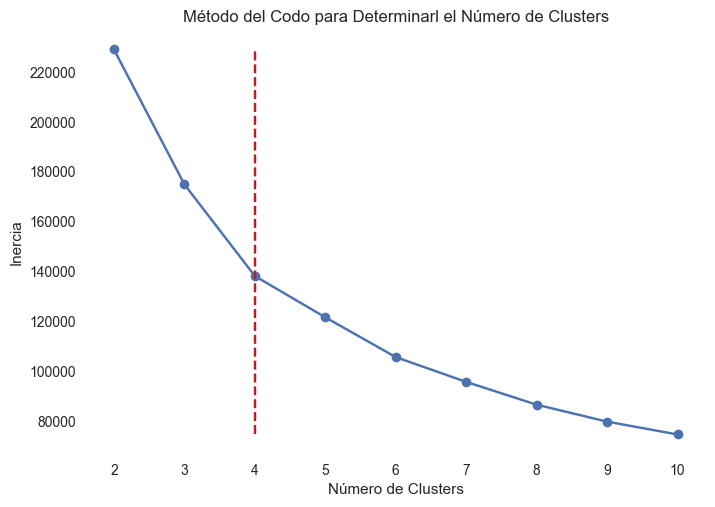

In [32]:
plt.plot(range(2, 11), inercia, marker = "o")
plt.vlines(x = 4, ymin = min(inercia), ymax = max(inercia), color = "firebrick", linestyles = "dashed")
plt.title("Método del Codo para Determinarl el Número de Clusters")
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [33]:
# Elegir el número óptimo de clusters basado en el método del codo
optimal_clusters = 4  # ajusta esto según la visualización del método del codo

In [34]:
kmeans = KMeans(n_clusters = optimal_clusters, random_state = 42)
dataset_p["cluster"] = kmeans.fit_predict(variables_escaladas)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
dataset_p.head()

,Customer_ID,SKU,DiaCompra,Monto_Venta,Cuotas,Edad,NSE,Genero,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra,Monto_Venta_log,cluster
689429,ID_091292,13103230,2019-12-08,139.00,1,25,C,F,San Borja,J04-DAMAS,J0414-BENETTON,SISLEY,2.143015,2
243144,ID_114776,12017686,2019-05-04,69.90,1,48,A,M,San Miguel,J08-PERFUMERIA,J0802-PERFUMERIA SELECTIVA,BEYONCE,1.844477,2
116783,ID_075292,12600703,2019-02-16,99.00,2,41,A,M,Surco,J01-HOMBRES,J0105-TOPS SPORT,LA MARTINA,1.995635,2
937809,ID_149234,13158149,2019-11-11,4.95,1,31,B,F,San Miguel,J13-DECORACION,J1304-REGALOS,MICA,0.694605,1
555114,ID_216999,11955372,2019-08-07,24.90,1,35,A,F,San Borja,J15-BASICOS DECOHOGAR,J1504-COMEDOR,BASEMENT HOME,1.396199,1


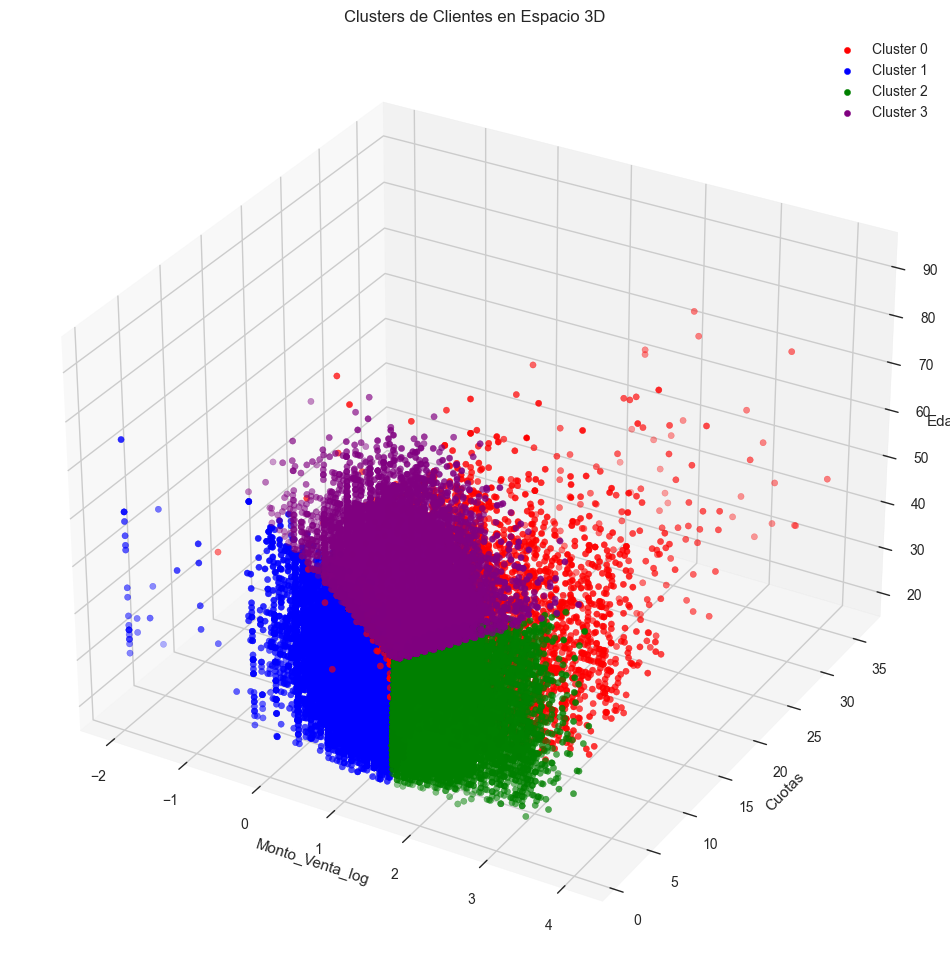

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Visualización de los clusters en 3D
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'purple', "yellow"]  # ajusta según el número de clusters
for cluster_id, color in zip(range(optimal_clusters), colors):
    cluster_data = dataset_p[dataset_p['cluster'] == cluster_id]
    ax.scatter(cluster_data['Monto_Venta_log'], cluster_data['Cuotas'], cluster_data['Edad'], c=color, label=f'Cluster {cluster_id}')

ax.set_xlabel('Monto_Venta_log')
ax.set_ylabel('Cuotas')
ax.set_zlabel('Edad')
ax.set_title('Clusters de Clientes en Espacio 3D')

# Añadir leyenda
ax.legend()

plt.show()

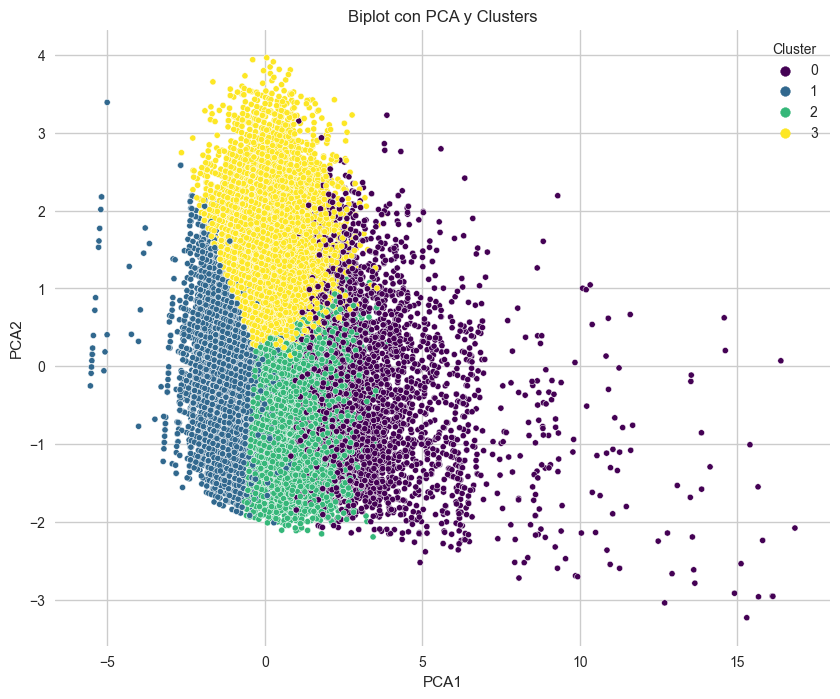

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas relevantes para PCA
features = ['Monto_Venta_log', 'Cuotas', 'Edad']

# Estandarizar las características
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataset_p[features])

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
dataset_p['PCA1'] = pca_result[:, 0]
dataset_p['PCA2'] = pca_result[:, 1]

# Crear un biplot con matplotlib y seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=dataset_p, palette='viridis', s=20)

# Añadir flechas para las características originales
#for i, feature in enumerate(features):
    #plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.8, width=0.1,
    #          head_width=0.1, head_length=0.1)
    #plt.text(pca.components_[0, i] * 1.3, pca.components_[1, i] * 1.3, feature, color='black', ha='center', va='center')

plt.title('Biplot con PCA y Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


In [39]:
## Perfilamiento

(
    dataset_p
    .groupby(["cluster"])
    .agg(prom_mto_vta = ("Monto_Venta", "mean"), 
         prom_cuotas = ("Cuotas", "mean"), 
         prom_edad = ("Edad", "mean"))
)

,prom_mto_vta,prom_cuotas,prom_edad
cluster,,,
0,308.783655,7.877648,45.858044
1,17.526737,1.397927,38.087283
2,148.252014,1.589282,37.119757
3,63.826429,1.507233,59.059636


In [46]:
# Sistema de recomendación simple basado en la segmentación
def recommend_products(cluster_id, num_recommendations = 5):

    cluster_data = dataset_p[dataset_p['cluster'] == cluster_id]

    # Criterio de recomendación
    top_products = cluster_data.groupby('SKU')['Monto_Venta'].sum().sort_values(ascending=False).index[:num_recommendations]

    return dataset_p[dataset_p['SKU'].isin(top_products)][['SKU', 'MarcaCompra']].drop_duplicates()

In [47]:
# Ejemplo de recomendación para un cliente específico (puedes ajustar el Customer_ID)
customer_id = 'ID_149234'
customer_cluster = dataset_p[dataset_p['Customer_ID'] == customer_id]['cluster'].values[0]
recommendations = recommend_products(customer_cluster, num_recommendations = 10)
print(f"Recomendaciones para el cliente {customer_id}:")
print(recommendations)


Recomendaciones para el cliente ID_149234:
              SKU MarcaCompra
482164   13097165      ADIDAS
781127   13008766       WELLY
469317   12073408          SM
1033975  11802242       DO IT
298769   10540493          SM
369668   12669565        YAMP
899187   13158880        MICA
909322   12766015       CLARO
510807   12218527        MICA
82314     9615431    AMBIENTA


In [49]:
dataset.query("Customer_ID == 'ID_149234'")

,Customer_ID,SKU,DiaCompra,Monto_Venta,Cuotas,Edad,NSE,Genero,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra
296879,ID_149234,11958938,4/26/2019,69.90,1,31,B,F,San Martin de Porres,J02-RINCON JUVENIL HOMBRES,J0201-DENIM RINCON JUVENIL,KORDA
432990,ID_149234,12410510,06/02/2019,199.00,3,31,B,F,San Martin de Porres,J02-RINCON JUVENIL HOMBRES,J0201-DENIM RINCON JUVENIL,LEVIS
673363,ID_149234,12579989,08/07/2019,23.94,1,31,B,F,San Martin de Porres,J09-NINOS,J0909-JUGUETERIA,SUPER LEADER SWEET GIRL
937809,ID_149234,13158149,11/11/2019,4.95,1,31,B,F,San Miguel,J13-DECORACION,J1304-REGALOS,MICA


In [51]:
dataset_p.query("SKU == 13008766")[["JerarquiaCompra", "JerarquiaCompra2", "MarcaCompra"]].drop_duplicates()

,JerarquiaCompra,JerarquiaCompra2,MarcaCompra
781127,J09-NINOS,J0909-JUGUETERIA,WELLY
